In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import pandas as pd
import math

# Linear Regression

In [2]:
# import data and make train test split
# we will use a 400/100 train/test ratio from our 500 datum.
df = pd.read_csv('Admission_Predict_Ver1.1.csv',sep=',')
X = df.iloc[:,1:8]
y = df.iloc[:,8]
labels = df.columns[1:]
x_trn, x_tst, y_trn, y_tst = model_selection.train_test_split(X, y, test_size=0.20, random_state=350)

In order to get a rough idea of the relationship between each parameter and the chance of admission, we will give scatterplots of each variable against chance of admission, a la the procedure in HW 2.

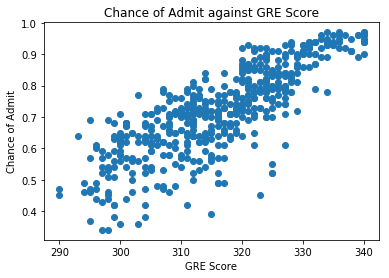

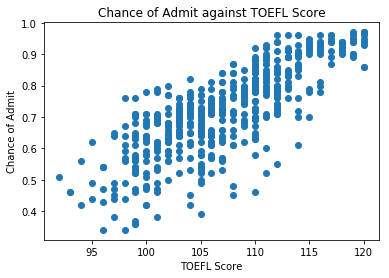

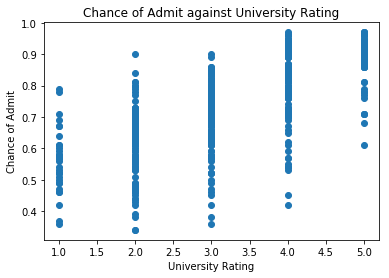

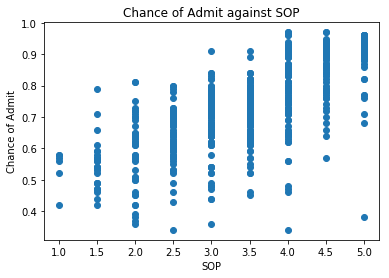

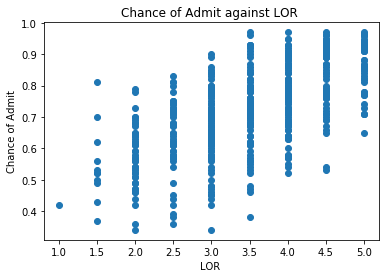

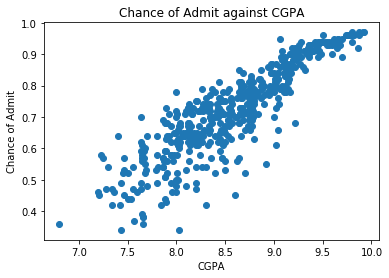

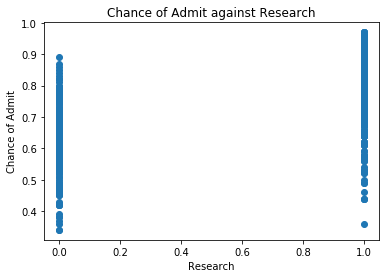

In [3]:
p = len(x_trn.iloc[0])

# plot scatter plots of each variable against Chance of Admit
for i in range(p):
    temp = X.iloc[:,i]
    plt.plot(temp,y,'o')
    plt.xlabel(df.columns[i+1])
    plt.ylabel("Chance of Admit")
    plt.title("Chance of Admit against "+str(df.columns[i+1]))
    plt.show()

As we can see from these plots, it seems that each of the parameters is positively correlated with admission probability.

Now we will perform a simple linear regression on the data, after scaling all the input variables to mean 0 and variance 1.

In [4]:
# get data into numpy
x_trn = np.array(x_trn)
x_tst = np.array(x_tst)
y_trn = np.array(y_trn)
y_tst = np.array(y_tst)

# scale the data
for i in range(7):
    mean_trn = np.mean(x_trn[:,i])
    mean_tst = np.mean(x_tst[:,i])
    var_trn = np.var(x_trn[:,i])
    var_tst = np.var(x_tst[:,i])
    x_trn[:,i] = (x_trn[:,i]-np.ones(400)*mean_trn)/math.sqrt(var_trn)
    x_tst[:,i] = (x_tst[:,i]-np.ones(100)*mean_tst)/math.sqrt(var_tst)

In [5]:
# fit linear regression
reg = LinearRegression().fit(x_trn,y_trn)

In [6]:
# display coefficients
reg.coef_

array([ 0.01967332,  0.01451809,  0.01000954,  0.00075494,  0.01642515,
        0.06895161,  0.01083138])

In [7]:
# display intercept
reg.intercept_

0.72712499999999991

In [8]:
# make predictions on test data and compute L-2 error
y_pred = reg.predict(x_tst)
print('L-2 error =',np.mean((y_pred-y_tst)**2))

L-2 error = 0.00520854685858


Next we perform ridge and lasso regression on our training data. The goal with these methods is to help determine the most important features in affecting chance of admission. We follow the procedure from HW2.

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [10]:
# create grid for tuning parameters
alpha = {'alpha' : [1e-1,1,2,3,4,5,6,7,8,10]}

# perform Ridge Regression
reg_ridge = Ridge(max_iter=int(1e5), tol = 1e-6)
ridge_regressor = GridSearchCV(reg_ridge, alpha, scoring = 'neg_mean_squared_error',cv=10, refit=True)
ridge_regressor = ridge_regressor.fit(x_trn,y_trn)

# perform Lasso Regression
reg_lasso = Lasso(max_iter=int(1e5),tol = 1e-6)
lasso_regressor = GridSearchCV(reg_lasso, alpha, scoring = 'neg_mean_squared_error',cv=10, refit=True)
lasso_regressor = lasso_regressor.fit(x_trn,y_trn)

In [11]:
print(ridge_regressor.best_params_)
print(lasso_regressor.best_params_)

{'alpha': 6}
{'alpha': 0.1}


We now further narrow down our search for the tuning parameters.

In [12]:
# perform further tuned ridge regression
alphas = np.arange(6.3,6.7,0.01)
alpha = {'alpha':alphas}
n = len(alphas)

reg_ridge = Ridge(max_iter=int(1e5), tol = 1e-6)
ridge_regressor = GridSearchCV(reg_ridge, alpha, scoring = 'neg_mean_squared_error',cv=10, refit=True)
ridge_regressor = ridge_regressor.fit(x_trn,y_trn)

# perform further tuned lasso regression
alphas = np.arange(1e-15,1e-10,1e-10)
alpha = {'alpha':alphas}
n = len(alphas)

reg_lasso = Lasso(max_iter=int(1e5),tol = 1e-6)
lasso_regressor = GridSearchCV(reg_lasso, alpha, scoring = 'neg_mean_squared_error',cv=10, refit=True)
lasso_regressor = lasso_regressor.fit(x_trn,y_trn)

In [13]:
print(ridge_regressor.best_params_)
print(lasso_regressor.best_params_)

{'alpha': 6.4599999999999964}
{'alpha': 1.0000000000000001e-15}


In [14]:
# compute MSE
y_pred_ridge = ridge_regressor.predict(x_tst)
print('L-2 error for Ridge =',np.mean((y_pred_ridge-y_tst)**2))

y_pred_lasso = lasso_regressor.predict(x_tst)
print('L-2 error for Lasso =',np.mean((y_pred_lasso-y_tst)**2))

L-2 error for Ridge = 0.00524156349172
L-2 error for Lasso = 0.00520854685858


In [15]:
# Print coefficients and intercepts for ridge and lasso regression
print("Ridge regression coefficients and intercept")
print(ridge_regressor.best_estimator_.coef_)
print(ridge_regressor.best_estimator_.intercept_)

print()

print("Lasso regression coefficients and intercept")
print(lasso_regressor.best_estimator_.coef_)
print(lasso_regressor.best_estimator_.intercept_)

Ridge regression coefficients and intercept
[ 0.02067544  0.01537169  0.01025875  0.00187992  0.01659938  0.06531718
  0.01083312]
0.727125

Lasso regression coefficients and intercept
[ 0.01967332  0.01451809  0.01000954  0.00075494  0.01642515  0.06895161
  0.01083138]
0.727125


In [16]:
df.columns[1:8]

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

As we can see frm this analysis, GPA seems to be the greatest influencer of chance of admission by quite a margin, while the Statement of Purpose is the least influential. We also notice that the simple linear regressions produce a very low L-2 test error, suggesting that these models can quite accurately describe the data.

# Decision Trees

I will mostly use my code for interpreting python trees from hw4. I will also use R code where necessary. So that the analysis makes sense for the data, we don't want to use scaled data. So first, we descale the data.

In [17]:
# redo train test split from the initial X and y matrices
x_trn, x_tst, y_trn, y_tst = model_selection.train_test_split(X, y, test_size=0.20, random_state=350)

# get data into numpy
x_trn = np.array(x_trn)
x_tst = np.array(x_tst)
y_trn = np.array(y_trn)
y_tst = np.array(y_tst)

In [18]:
# use a few of the methods I used in HW 4 to build and interpret decision trees.
from sklearn import tree

# retrieve and print all necessary information about the created
# tree regressor. Gives the verbal interpretation as if explaining
# to a doctor.
def interpret(model):
    import numpy as np
    n_nodes = model.tree_.node_count
    values = np.resize(model.tree_.value,n_nodes)
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    temp = model.tree_.feature
    feature = np.zeros(n_nodes,dtype=object)
    for i in range(n_nodes):
        if temp[i] < 0:
            feature[i] = 'leaf'
        else:
            feature[i] = df.columns[temp[i]+1]
    threshold = model.tree_.threshold
    
    print("We interpret the tree as follows: ")
    print()
    
    for i in range(n_nodes):
        if i == 0:
            print("Root: If",feature[i],"<=",threshold[i],"go to node",
                  children_left[i],", else go to node",children_right[i])
        elif feature[i] != 'leaf':
            print("Node",i,": If",feature[i],"<=",threshold[i],"go to node",
                  children_left[i],", else go to node",children_right[i])
        else:
            print("Node",i,": Predict Chance of Admit =",values[i])
            
# let this do all the work for each part
def dothework(depth,parts,leaf_size):
    # fit tree with given restriction
    from sklearn import tree
    reg = tree.DecisionTreeRegressor(max_depth=depth,max_leaf_nodes=parts,min_samples_leaf=leaf_size)
    reg.fit(x_trn,y_trn)
    
    # compute MSE
    MSE = np.mean((reg.predict(x_tst)-y_tst)**2)
    print("Mean squared error =",MSE)
    print()
    # interpret the decision tree
    interpret(reg)

In [19]:
# fit and interpret decision tree with max_depth = 2
dothework(2,None,1)

Mean squared error = 0.00697777819158

We interpret the tree as follows: 

Root: If CGPA <= 8.73499965668 go to node 1 , else go to node 4
Node 1 : If CGPA <= 8.03499984741 go to node 2 , else go to node 3
Node 2 : Predict Chance of Admit = 0.561375
Node 3 : Predict Chance of Admit = 0.685779220779
Node 4 : If CGPA <= 9.18499946594 go to node 5 , else go to node 6
Node 5 : Predict Chance of Admit = 0.7957
Node 6 : Predict Chance of Admit = 0.920606060606


As we can see, the decision tree with maximum depth of 2 also picks up the fact that GPA is the most important feature, as all decisions are based on this feature. Additionally, we notice that MSE is still pretty good.

In [20]:
# build and interpret decision tree of max_depth=3
dothework(3,None,1)

Mean squared error = 0.00583547406628

We interpret the tree as follows: 

Root: If CGPA <= 8.73499965668 go to node 1 , else go to node 8
Node 1 : If CGPA <= 8.03499984741 go to node 2 , else go to node 5
Node 2 : If GRE Score <= 306.5 go to node 3 , else go to node 4
Node 3 : Predict Chance of Admit = 0.523488372093
Node 4 : Predict Chance of Admit = 0.605405405405
Node 5 : If CGPA <= 8.32499980927 go to node 6 , else go to node 7
Node 6 : Predict Chance of Admit = 0.651694915254
Node 7 : Predict Chance of Admit = 0.706947368421
Node 8 : If CGPA <= 9.18499946594 go to node 9 , else go to node 12
Node 9 : If CGPA <= 8.93000030518 go to node 10 , else go to node 11
Node 10 : Predict Chance of Admit = 0.757
Node 11 : Predict Chance of Admit = 0.8215
Node 12 : If CGPA <= 9.34500026703 go to node 13 , else go to node 14
Node 13 : Predict Chance of Admit = 0.895909090909
Node 14 : Predict Chance of Admit = 0.932954545455


With depth of 3, the tree still almost entirely depends on GPA, but it depends on GRE score as well.

In [21]:
# build and interpret decision tree with max_leaf_nodes=6
dothework(None,6,1)

Mean squared error = 0.00627566566335

We interpret the tree as follows: 

Root: If CGPA <= 8.73499965668 go to node 1 , else go to node 2
Node 1 : If CGPA <= 8.03499984741 go to node 3 , else go to node 4
Node 2 : If CGPA <= 9.18499946594 go to node 5 , else go to node 6
Node 3 : If GRE Score <= 306.5 go to node 7 , else go to node 8
Node 4 : If CGPA <= 8.32499980927 go to node 9 , else go to node 10
Node 5 : Predict Chance of Admit = 0.7957
Node 6 : Predict Chance of Admit = 0.920606060606
Node 7 : Predict Chance of Admit = 0.523488372093
Node 8 : Predict Chance of Admit = 0.605405405405
Node 9 : Predict Chance of Admit = 0.651694915254
Node 10 : Predict Chance of Admit = 0.706947368421


With a tree of max leaf nodes = 6, we have a decently small tree that is quite interpretable. Same as before we only need GPA and GRE score to make a decision.

In [22]:
# build and interpret decision tree with minimum node size of 30
dothework(None,None,30)

Mean squared error = 0.00574787664496

We interpret the tree as follows: 

Root: If CGPA <= 8.73499965668 go to node 1 , else go to node 12
Node 1 : If CGPA <= 8.03499984741 go to node 2 , else go to node 5
Node 2 : If GRE Score <= 306.5 go to node 3 , else go to node 4
Node 3 : Predict Chance of Admit = 0.523488372093
Node 4 : Predict Chance of Admit = 0.605405405405
Node 5 : If CGPA <= 8.32499980927 go to node 6 , else go to node 7
Node 6 : Predict Chance of Admit = 0.651694915254
Node 7 : If GRE Score <= 317.5 go to node 8 , else go to node 11
Node 8 : If TOEFL Score <= 105.5 go to node 9 , else go to node 10
Node 9 : Predict Chance of Admit = 0.696451612903
Node 10 : Predict Chance of Admit = 0.691333333333
Node 11 : Predict Chance of Admit = 0.730294117647
Node 12 : If CGPA <= 9.18499946594 go to node 13 , else go to node 18
Node 13 : If CGPA <= 8.93000030518 go to node 14 , else go to node 15
Node 14 : Predict Chance of Admit = 0.757
Node 15 : If CGPA <= 9.09000015259 go to node 

Restricting the tree by minimum samples to a leaf leads to a fairly interpretable tree that is also quite accurate. With this method, we also use more factors beyond GPA and GRE score, which means this decision tree is more holistic.

Next, let's try out pruning. We'll follow a similar procedure to that of HW 4. Notably, we employ cross validation with 5 folds to determine the proper tuning penalty.

In [23]:
# save data sets as csv's to be retrieved by R
np.savetxt("x_trn.csv", x_trn, delimiter=",")
np.savetxt("y_trn.csv",y_trn,delimiter=",")
np.savetxt("x_tst.csv",x_tst,delimiter=',')
np.savetxt("y_tst.csv",y_tst,delimiter=",")

In [24]:
# run R code
from rpy2 import robjects
robjects.r('''
library(rpart)

# load all data from csv files
train = read.csv("~/Documents/2019 Spring/ORF 350/hw7/train.csv"
                    ,header=TRUE)
test = read.csv("~/Documents/2019 Spring/ORF 350/hw7/test.csv"
                ,header=TRUE)

# build the tree
tree = rpart(ChanceofAdmit~GREScore+TOEFLScore+UniversityRating+SOP+LOR+CGPA+Research,
             method="anova",data=train,
             control=rpart.control(minsplit=2,minbucket=30),xval=5)

# plot tree
plot(tree, uniform=TRUE,main="Regression Tree for Chance of Admit ")
text(tree, use.n=TRUE, all=TRUE, cex=.4)

# find optimal cp value
plotcp(tree)
print(tree$cptable)

# prune the tree based on cp value which minimizes error
ptree = prune(tree,cp=tree$cptable[which.min(tree$cptable[,"xerror"]),"CP"])

# plot the pruned tree
plot(ptree, uniform=TRUE,main="Pruned Regression Tree for Chance of Admit ")
text(ptree, use.n=TRUE, all=TRUE, cex=.4)

mse = mean((predict(ptree,test[,1:7])-test[,8])^2)
print(mse)
print(tree$cptable[which.min(tree$cptable[,"xerror"]),"CP"])
''')

          CP nsplit rel error    xerror       xstd
1 0.53870789      0 1.0000000 1.0047076 0.06354912
2 0.11065307      1 0.4612921 0.5099643 0.03835852
3 0.08423668      2 0.3506390 0.3732920 0.03143633
4 0.01812287      3 0.2664024 0.3057906 0.03039488
5 0.01508886      4 0.2482795 0.2899227 0.02826533
6 0.01355904      5 0.2331906 0.2886670 0.02811491
7 0.01000000      6 0.2196316 0.2866880 0.02806909
[1] 0.006009513
[1] 0.01


0.010000


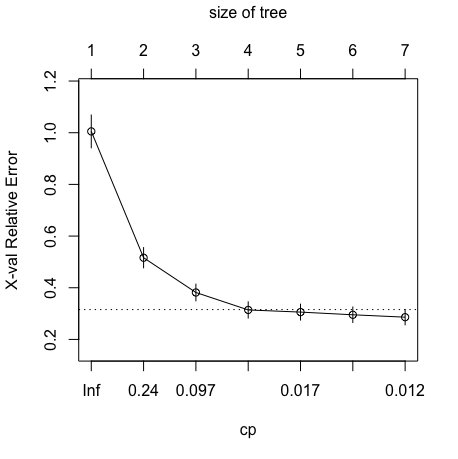

In [25]:
# display relevant figures produced in R
from IPython.display import Image
Image(filename='cptable.png') 

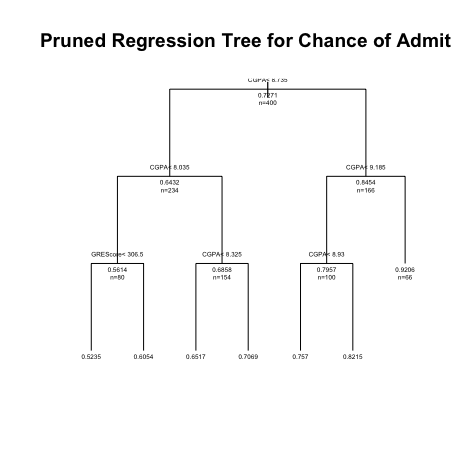

In [26]:
Image(filename="pruned_tree.png")

# Classification

Instead of dealing with chance of admit values ranging between 0 and 1, we can make them binary values, either 0 or 1, in order to describe students with a high chance of admission or a low chance of admission, therefore taking our regression problem and making it a classification problem. Since very few students have less than a 50% chance of admission, it makes more sense to split up the data into 50/50 pools, i.e. the 250 students with the highest chance of admit we designate 1 (or high probability of admission) and others we denote with zero. 

After transforming the data, we'll start with a simple hinge-loss linear SVM classifier.

In [27]:
# transform Chance of Admit data into binary values for classification
y = np.array(y)
threshold = np.median(y)
for i in range(400):
    y_trn[i] = (y_trn[i] > threshold)
for i in range(100):
    y_tst[i] = (y_tst[i] > threshold)
    
# scale the data for SVM and logistic regression
# scale the data
for i in range(7):
    mean_trn = np.mean(x_trn[:,i])
    mean_tst = np.mean(x_tst[:,i])
    var_trn = np.var(x_trn[:,i])
    var_tst = np.var(x_tst[:,i])
    x_trn[:,i] = (x_trn[:,i]-np.ones(400)*mean_trn)/math.sqrt(var_trn)
    x_tst[:,i] = (x_tst[:,i]-np.ones(100)*mean_tst)/math.sqrt(var_tst)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
svm = LinearSVC(loss='hinge',max_iter=int(5e6), tol = 1e-4, penalty = 'l2')
alphas = {'C': [1e-1,1,2,3,4,5]}
svm_CV = GridSearchCV(svm, alphas, scoring = 'neg_mean_squared_error',cv=10, refit=True)
svm_fit = svm_CV.fit(x_trn,y_trn)

In [29]:
# compute accuracy
y_pred = svm_fit.predict(x_tst)
print(np.mean(y_pred == y_tst))

0.89


In [30]:
# logistic classifier
from sklearn.linear_model import LogisticRegression
reg_logistic = LogisticRegression(solver='lbfgs',C=1e10).fit(x_trn, y_trn)

In [31]:
# compute accuracy
y_pred = reg_logistic.predict(x_tst)
print(np.mean(y_pred == y_tst))

0.88


In [40]:
# run R code
from rpy2 import robjects
robjects.r('''
library(rpart)

# load all data from csv files
train = read.csv("~/Documents/2019 Spring/ORF 350/hw7/train.csv"
                 ,header=TRUE)
test = read.csv("~/Documents/2019 Spring/ORF 350/hw7/test.csv"
                ,header=TRUE)
threshold = 0.72

# transform data for classification
for (i in 1:400) {
  if (train[i,8] > threshold) {
    train[i,8] = 1
  } else {
    train[i,8] = 0
  }
}
for (i in 1:100) {
  if (test[i,8] > threshold) {
    test[i,8] = 1
  } else {
    test[i,8] = 0
  }
}
# build the tree
tree = rpart(ChanceofAdmit~GREScore+TOEFLScore+UniversityRating+SOP+LOR+CGPA+Research,
             method="class",data=train,
             control=rpart.control(minsplit=2,minbucket=5),xval=5)

# plot tree
plot(tree, uniform=TRUE,main="Classification Tree for Chance of Admit ")
text(tree, use.n=TRUE, all=TRUE, cex=.4)

# find optimal cp value
plotcp(tree)
print(tree$cptable)

# prune the tree based on cp value which minimizes error
ptree = prune(tree,cp=tree$cptable[which.min(tree$cptable[,"xerror"]),"CP"])

# plot the pruned tree
plot(ptree, uniform=TRUE,main="Pruned Classification Tree for Chance of Admit ")
text(ptree, use.n=TRUE, all=TRUE, cex=.4)

mse = mean((predict(ptree,test[,1:7])-test[,8])^2)
print(mse)
''')

          CP nsplit rel error    xerror       xstd
1 0.69948187      0 1.0000000 1.0000000 0.05178173
2 0.01727116      1 0.3005181 0.3626943 0.03937483
3 0.01036269      4 0.2487047 0.3264249 0.03774835
4 0.01000000      8 0.2072539 0.3264249 0.03774835
[1] 0.4042575


0.404257


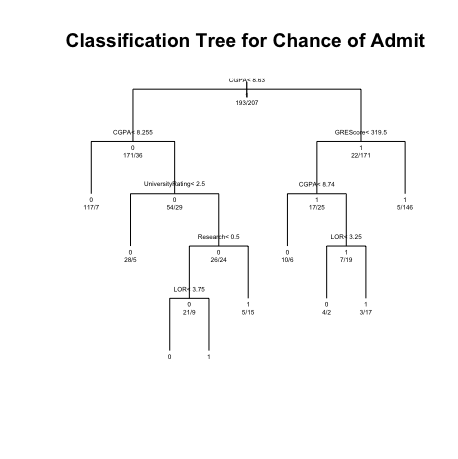

In [42]:
Image(filename='clstree.png')

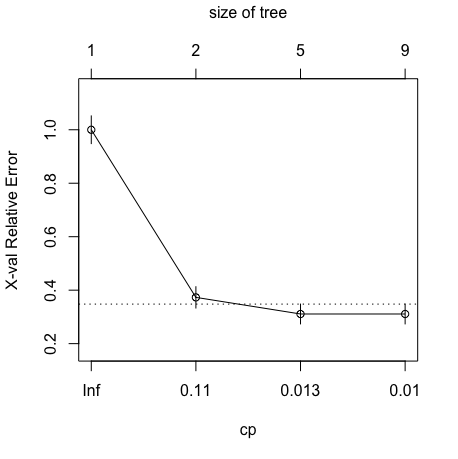

In [43]:
Image(filename='clscptable.png')

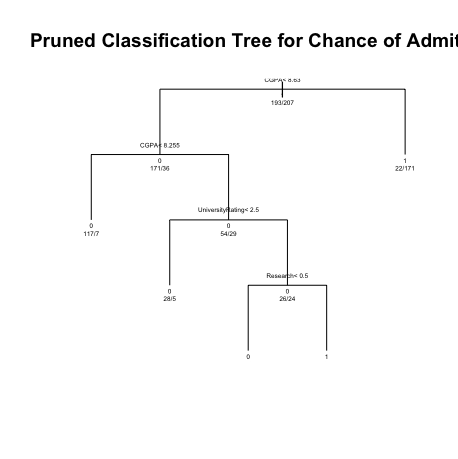

In [44]:
Image(filename='prunedclstree.png')